x: (10000, 1), weights: (1, 1), bias: (1,), y: (10000, 1)


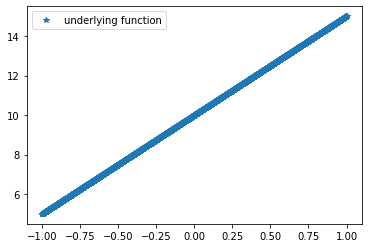

In [46]:
import numpy as np
import matplotlib.pyplot as plt
d = 1
x = np.random.uniform(-1, 1, size = (10000, 1))
weights_true = np.array([[5],])
bias_true = np.array([10])

#y = ax + b
y_true = x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')
plt.plot(x, y_true, '*', label='underlying function')
plt.legend()

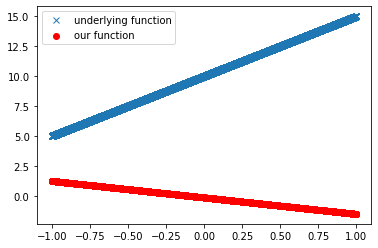

In [47]:
class Linear:
  def __init__(self, input_dim, num_hidden=1):
    self.weights = np.random.randn(input_dim, num_hidden)
    self.bias = np.random.randn(num_hidden)
  
  def __call__(self, x):
    return x @ self.weights + self.bias

linear = Linear(d)
y_pred = linear(x) #linear.__call__(x)
plt.plot(x, y_true, 'x', label='underlying function')
plt.scatter(x, y_pred, c='r', label='our function')
plt.legend()

In [48]:
class MSE:
  def __call__(self, y_true, y_pred):
    self.y_true = y_true
    self.y_pred = y_pred
    return ((y_true - y_pred) ** 2).mean()

loss = MSE()
print(f'Our initial loss is {loss(y_pred, y_true)}')

Our initial loss is 116.30307672073336


In [49]:
class MSE:
  def __call__(self, y_pred, y_true):
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient

class Linear:
  def __init__(self, input_dim, num_hidden = 1):
    self.weights = np.random.rand(input_dim, num_hidden)
    self.bias = np.random.rand(num_hidden)
  
  def __call__(self, x):
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)

  def update(self, lr):
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [50]:
loss = MSE()
linear = Linear(d)
y_pred = linear(x) # linear.__call__(x)
print(loss(y_pred, y_true))
loss_gradiente = loss.backward()
linear.backward(loss_gradiente)
linear.update(0.1)
y_pred = linear(x)
print(loss(y_pred, y_true))

91.26640544656709
59.93032269431201


Epoch 0, loss 98.73123024397097
Epoch 5, loss 12.936266626051184
Epoch 10, loss 2.5569577035943825
Epoch 15, loss 0.8587011700277406
Epoch 20, loss 0.38436636607199787
Epoch 25, loss 0.18739739684954448
Epoch 30, loss 0.09320699373167766
Epoch 35, loss 0.046561784249609925


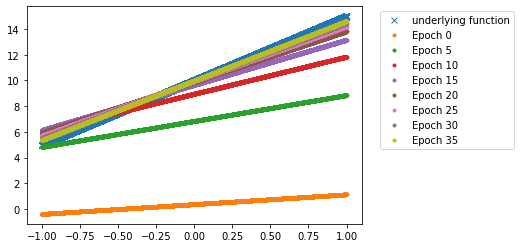

In [51]:
plt.plot(x, y_true, 'x', label='underlying function')

loss = MSE()
linear = Linear(d)

num_epochs = 40
lr = 0.1

for epoch in range(num_epochs):
  y_pred = linear(x)
  loss_value = loss(y_pred, y_true)

  if epoch % 5 == 0:
    print(f'Epoch {epoch}, loss {loss_value}')
    plt.plot(x, y_pred, '.', label=f'Epoch {epoch}')

  gradient_from_loss = loss.backward()
  linear.backward(gradient_from_loss)
  linear.update(lr)

plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left");